HEART FAILURE DISEASE 

data collection

In [103]:
import pandas as pd 
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [104]:
d = df.isnull().sum()
d

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

data preprocessing 

In [105]:
dummies = pd.get_dummies(df.ChestPainType)
df = pd.concat([df, dummies],axis=1)
dummies_2 = pd.get_dummies(df.RestingECG)
df = pd.concat([df, dummies_2],axis=1)
dummies_3 = pd.get_dummies(df.ExerciseAngina)
df = pd.concat([df, dummies_3],axis=1)
dummies_4 = pd.get_dummies(df.ST_Slope)
df = pd.concat([df, dummies_4],axis=1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1


In [106]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,...,0,1,0,1,0,1,0,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,...,0,0,0,1,0,1,0,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,...,0,0,0,1,0,0,1,0,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,...,0,0,1,0,0,1,0,0,1,0


In [107]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [108]:
df["Sex"] = label.fit_transform(df["Sex"])
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,1,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,0,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,1,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,1,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1


feature selection

In [109]:
x = df.drop(["ChestPainType","RestingECG","ExerciseAngina","ST_Slope"], axis=1)
x.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,1,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [110]:
y = df["HeartDisease"]
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[0.24489796, 1.        , 0.7       , ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.        , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.18367347, 1.        , 0.65      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.65      , ..., 0.        , 1.        ,
        0.        ],
       [0.59183673, 0.        , 0.65      , ..., 0.        , 1.        ,
        0.        ],
       [0.20408163, 1.        , 0.69      , ..., 0.        , 0.        ,
        1.        ]])

data splitting 

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2)

In [113]:
from sklearn.model_selection import cross_val_score

LOGISTIC REGRESSION 

model selection & model training

In [114]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

evaluate model

In [115]:
logistic.score(x_test,y_test)

1.0

In [116]:
score = cross_val_score(LogisticRegression(),x_scaler,y,cv =5)
score

array([1., 1., 1., 1., 1.])

In [117]:
y_pre = logistic.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00       106

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



In [118]:
y_pre = logistic.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[ 78,   0],
       [  0, 106]], dtype=int64)

<Axes: >

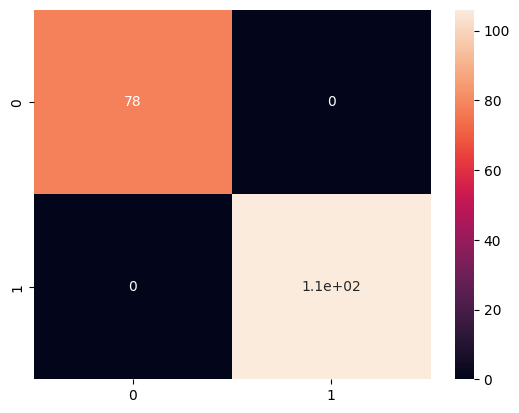

In [119]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

DECISION TREE

model selection & model training

In [120]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

evaluate model

In [121]:
tree.score(x_test,y_test)

1.0

In [122]:
score = cross_val_score(DecisionTreeClassifier(),x_scaler,y,cv =5)
score

array([1., 1., 1., 1., 1.])

In [123]:
y_pre = tree.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00       106

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



In [124]:
y_pre = tree.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[ 78,   0],
       [  0, 106]], dtype=int64)

<Axes: >

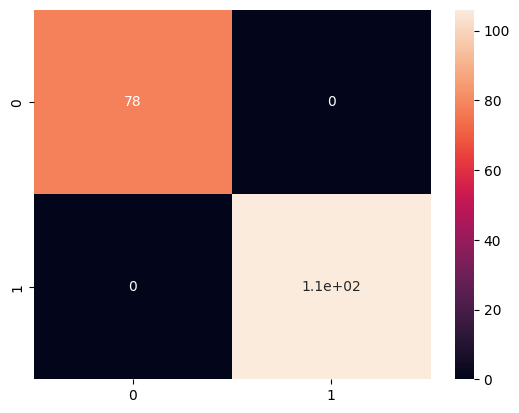

In [125]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

RANDOM FORSETS 

model selection & model training

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

evaluate model

In [127]:
rf.score(x_test,y_test)

1.0

In [128]:
score = cross_val_score(RandomForestClassifier(),x_scaler,y,cv =5)
score

array([1., 1., 1., 1., 1.])

In [129]:
y_pre = rf.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00       106

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



In [130]:
y_pre = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[ 78,   0],
       [  0, 106]], dtype=int64)

<Axes: >

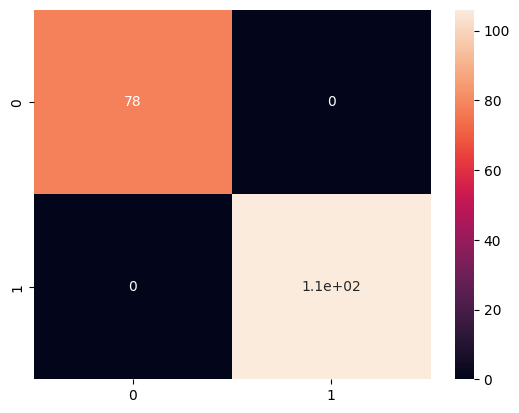

In [131]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

KNN

model selection & model training

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

evaluate model

In [133]:
knn.score(x_test,y_test)

0.9510869565217391

In [134]:
score = cross_val_score(KNeighborsClassifier(),x_scaler,y,cv =5)
score

array([0.97282609, 0.93478261, 0.95108696, 0.93989071, 0.89071038])

In [135]:
y_pre = knn.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        79
           1       0.95      0.96      0.96       105

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184



In [136]:
y_pre = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[ 74,   5],
       [  4, 101]], dtype=int64)

<Axes: >

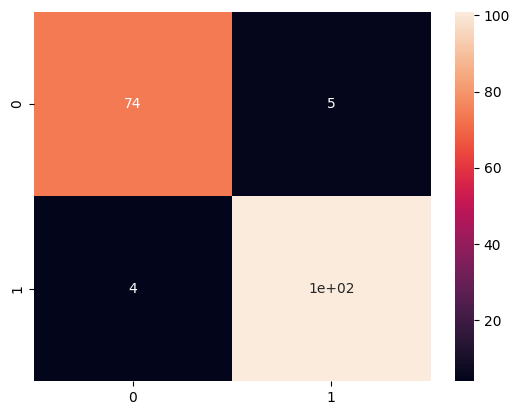

In [137]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

SVC

model selection & model training

In [138]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC()

evaluate model

In [139]:
svm.score(x_test,y_test)

1.0

In [140]:
score = cross_val_score(SVC(),x_scaler,y,cv =5)
score

array([1., 1., 1., 1., 1.])

In [141]:
y_pre = svm.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00       106

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



In [142]:
y_pre = svm.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[ 78,   0],
       [  0, 106]], dtype=int64)

<Axes: >

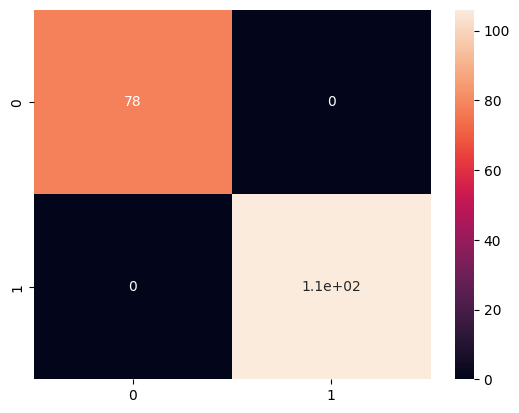

In [143]:
import seaborn as sns 
sns.heatmap(cm, annot=True)